<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe19 - Decision Tree Exercise 1

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






# Section 1

Reference: https://www.kaggle.com/vinicius150987/bank-full-machine-learning/notebook

# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.express as px

## Read "bank-full.csv"

In [2]:
df = pd.read_csv("../Data files/bank-full.csv",delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Check the distribution of labels (‘yes’, ‘no’) are distributed.


In [3]:
yesdist = len(df[df['y']=='yes'])
nodist = len(df[df['y']=='no'])
print(yesdist,nodist)
labels = ["Yes", "No"]
values = [yesdist, nodist]
fig = go.Figure(data=[
    go.Bar(x=['Yes', 'No'], y=values)
])

# Add labels and title to the graph
fig.update_layout(
    title='Number of "Yes" and "No" Responses',
    xaxis_title='Responses',
    yaxis_title='Count'
)

# Display the graph
fig.show()

5289 39922


## Counts of "yes" and "no" with "age"

In [4]:
df.groupby('age')['y'].value_counts()

age  y  
18   yes     7
     no      5
19   no     24
     yes    11
20   no     35
            ..
92   yes     2
93   yes     2
94   no      1
95   no      1
     yes     1
Name: y, Length: 148, dtype: int64

## Correlation between the data

In [5]:
cor=df.corr(numeric_only=True)
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Plot the heatmap

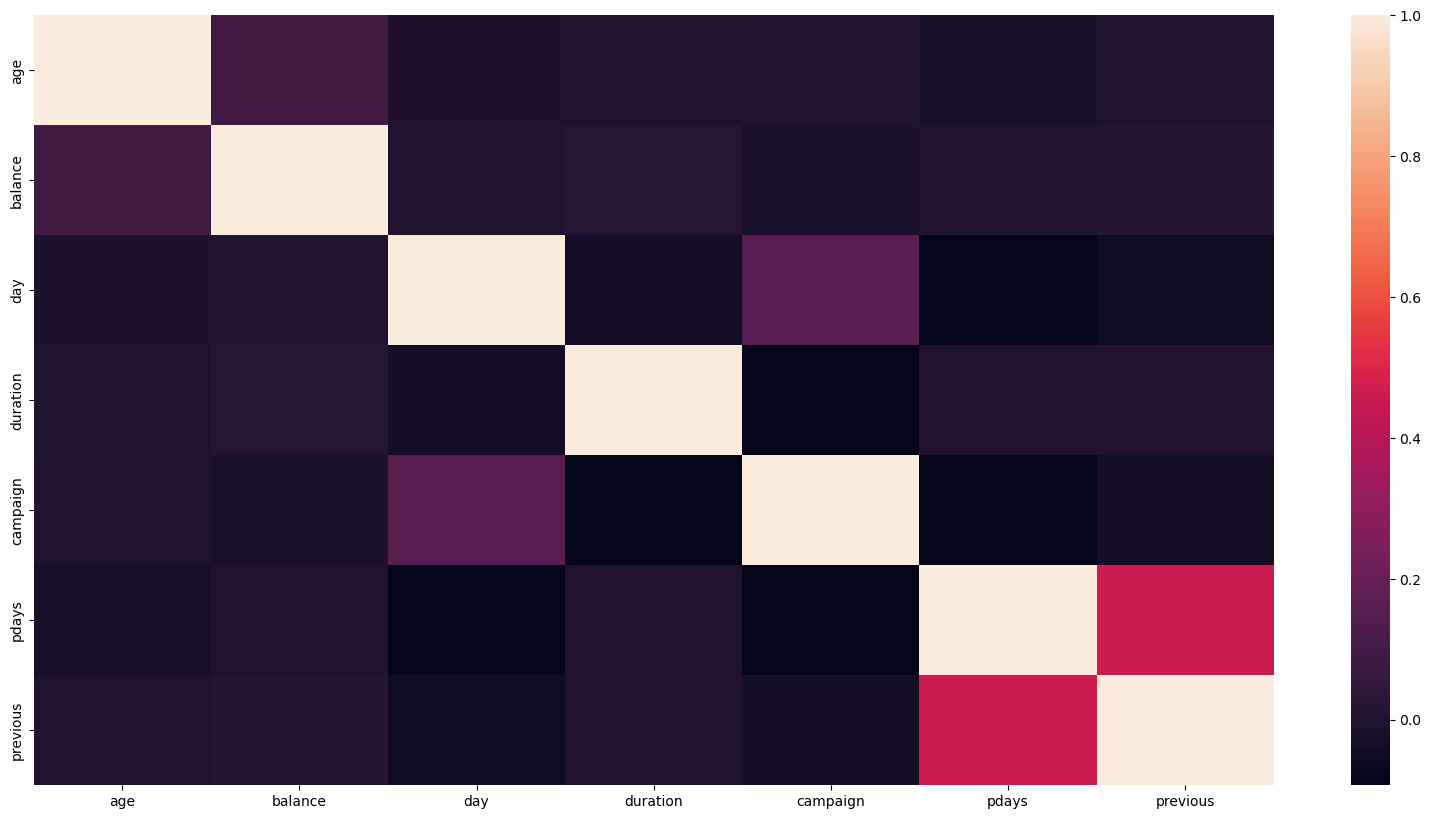

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(cor)
plt.show()

## Convert categorical data into numerical

In [7]:
replace_response = {'yes': 1, 'no': 0}
df = df.replace({'default': replace_response, 'housing': replace_response, 'loan': replace_response,\
                 'y': replace_response,})
replace_marital = {'single': 1, 'married': 2, 'divorced': 3}
df['marital'] = df['marital'].replace(replace_marital)
replace_education = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': None}
df['education'] = df['education'].replace(replace_education)
replace_contact = {'telephone': 1, 'cellular': 2, 'unknown': None}
df['contact'] = df['contact'].replace(replace_contact)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,2,3.0,0,2143,1,0,NaN,5,may,261,1,-1,0,unknown,0
1,44,technician,1,2.0,0,29,1,0,NaN,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,2,2.0,0,2,1,1,NaN,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,2,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,unknown,0
4,33,unknown,1,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,2,3.0,0,825,0,0,2.0,17,nov,977,3,-1,0,unknown,1
45207,71,retired,3,1.0,0,1729,0,0,2.0,17,nov,456,2,-1,0,unknown,1
45208,72,retired,2,2.0,0,5715,0,0,2.0,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,2,2.0,0,668,0,0,1.0,17,nov,508,4,-1,0,unknown,0


Next step is to select features and labels

In [8]:
da = df.copy()
da.dropna(subset=['education', 'contact'], inplace=True)
feature_cols = ['age', 'marital', 'education', 'balance', 'housing', 'loan', 'duration', 'campaign']
X = da[feature_cols]
y = da.y

Drop "poutcome"

In [9]:
del df['poutcome']
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,2,3.0,0,2143,1,0,NaN,5,may,261,1,-1,0,0
1,44,technician,1,2.0,0,29,1,0,NaN,5,may,151,1,-1,0,0
2,33,entrepreneur,2,2.0,0,2,1,1,NaN,5,may,76,1,-1,0,0
3,47,blue-collar,2,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,0
4,33,unknown,1,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,2,3.0,0,825,0,0,2.0,17,nov,977,3,-1,0,1
45207,71,retired,3,1.0,0,1729,0,0,2.0,17,nov,456,2,-1,0,1
45208,72,retired,2,2.0,0,5715,0,0,2.0,17,nov,1127,5,184,3,1
45209,57,blue-collar,2,2.0,0,668,0,0,1.0,17,nov,508,4,-1,0,0


## Split the data into train and test

In [10]:
# Target variable
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics,tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Applying Decision Tree Classifier:

Next, I created a pipeline of StandardScaler (standardize the features) and DT Classifier (see a note below regarding Standardization of features). We can import DT classifier as from sklearn.tree import DecisionTreeClassifier from Scikit-Learn. To determine the best parameters (criterion of split and maximum tree depth) for DT classifier, I also used Grid Search Cross Validation. The code snippet below is self-explanatory.

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth =3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## To display

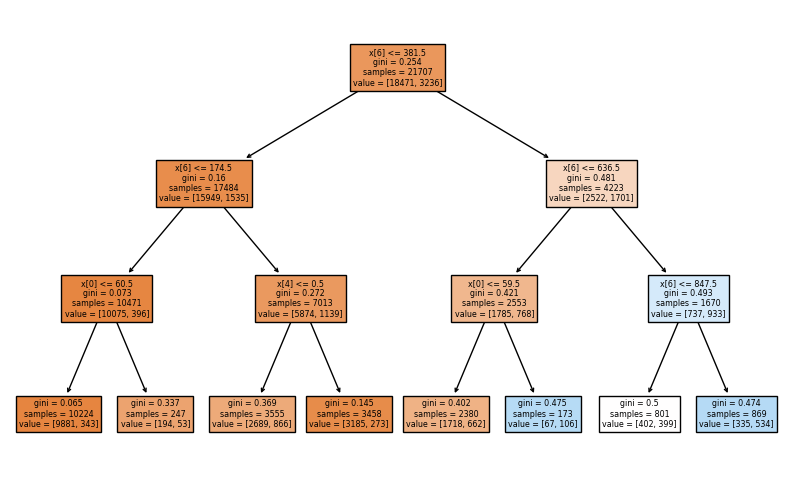

In [12]:
plt.figure(figsize=(10,6))
tree.plot_tree(clf,filled=True)
plt.show()

The number of nodes and the maximum depth

In [13]:
print(clf.tree_.node_count,clf.tree_.max_depth)

15 3


## Accuracy measurement

In [14]:
# Model Accuracy, how often is the classifier correct?
metrics.accuracy_score(y_test,y_pred)

0.869518486672399

# Prediction

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Grid Search

In [16]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test,y_pred))
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('dec_tree',clf)])
criterion = ['gini','entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dec_tree__criterion = criterion,dec_tree__max_depth=max_depth)
grid_search = GridSearchCV(pipe,parameters)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('dec_tree',
                                        DecisionTreeClassifier(max_depth=3))]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

## Display the best features

In [17]:
for feature, importance in zip(feature_cols,clf.feature_importances_):
    print(f"{feature}:{importance}")

age:0.0472818139419897
marital:0.0
education:0.0
balance:0.0
housing:0.08656876612385284
loan:0.0
duration:0.8661494199341575
campaign:0.0


## Run DecisionTreeClassifier using the obtained features

In [18]:
optimized_classifier = DecisionTreeClassifier(criterion='gini',max_depth=2)
optimized_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

## Concat train test results

In [19]:
y_pred_train = optimized_classifier.predict(X_train)
y_pred_test = optimized_classifier.predict(X_test)
y_pred_train = y_pred_train.reshape(len(y_pred_train),1)
y_pred_test = y_pred_test.reshape(len(y_pred_test),1)
print('train result')
print(np.concatenate((y_pred_train,y_train.to_numpy().reshape(len(y_train),1)),1))
print('test result')
print(np.concatenate((y_pred_test,y_test.to_numpy().reshape(len(y_test),1)),1))

train result
[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
test result
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Section 2
1. Read "petrol_consumption.csv" file

In [20]:
petrol_df = pd.read_csv('../Data files/petrol_consumption.csv')

2. Display the first 5 records

In [21]:
petrol_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


4. Identify the label (Petrol_Consumption)


In [22]:
petrol_df['Petrol_Consumption']

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

5. Identify the features. 

In [23]:
petrol_features = petrol_df.columns.to_list()
petrol_features

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)',
 'Petrol_Consumption']

6. Use of describe method to describe the dataset.

In [24]:
petrol_df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


7. Display the first 5 records of the features

In [25]:
petrol_df[petrol_features].head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


8. Split the data into training (80%) and testing (20%) sets.

In [26]:
X3=petrol_df[petrol_features]
y3=petrol_df.Petrol_Consumption

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=1)

9. Build your model and train the training data

In [27]:
from sklearn.tree import DecisionTreeRegressor
clf2 = DecisionTreeRegressor(max_depth =3)
clf2 = clf2.fit(X3_train,y3_train)
y_pred2 = clf2.predict(X3_test)

10. Prediction using the testing set

In [28]:
y_pred2

array([640.        , 525.75      , 640.        , 640.        ,
       582.5       , 377.        , 582.5       , 582.5       ,
       705.66666667, 640.        ])

11. Display Actual and Predictied price side by side in df

In [29]:
compare_df = pd.DataFrame({'Actual': y3_test, 'Predicted': y_pred2}).reset_index(drop=True)
compare_df

,Actual,Predicted
0,628,640.000000
1,547,525.750000
2,648,640.000000
3,640,640.000000
4,561,582.500000
5,414,377.000000
6,554,582.500000
7,577,582.500000
8,782,705.666667
9,631,640.000000


12. Evaluate the model using mean_absulate_error

In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y3_test,y_pred2)

21.90833333333334

13. Display the predicted output using first 5 features.

In [31]:
clf2.predict(X3[:5])

array([525.75, 525.75, 582.5 , 377.  , 377.  ])